# Trabajo Práctico 2
Implementar un aplicativo que ejecute las operaciones de aritmética de pixels básicas (suma clampeada, suma promediada, resta clampeada, resta promediada, if lighter, if darker...).

In [12]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [13]:
def rgb_yiq(img1):
    yiq=np.zeros(img1.shape)
    yiq[:,:,0] = 0.299*img1[:,:,0] + 0.587*img1[:,:,1] + 0.114*img1[:,:,2]
    yiq[:,:,1] = 0.595716*img1[:,:,0] - 0.274453*img1[:,:,1] - 0.321263*img1[:,:,2]
    yiq[:,:,2] = 0.211456*img1[:,:,0] - 0.522591*img1[:,:,1] + 0.311135*img1[:,:,2]
    return yiq

Genero una función que transforma la imagen desde el espacio YIQ al RGB.

In [14]:
def yiq_rgb(yiq3):
    rgb=np.zeros(yiq3.shape)
    rgb[:,:,0] = yiq3[:,:,0] + 0.9663*yiq3[:,:,1] + 0.6210*yiq3[:,:,2]
    rgb[:,:,1] = yiq3[:,:,0] - 0.2721*yiq3[:,:,1] - 0.6474*yiq3[:,:,2]
    rgb[:,:,2] = yiq3[:,:,0] - 1.1070*yiq3[:,:,1] + 1.7046*yiq3[:,:,2]
    return rgb

Genero una funcion que realiza la SUMA CLAMPEADA de dos imágenes en el espacio YIQ.

In [15]:
def sum_clamp(yiq1, yiq2):
    yiq3=np.zeros(yiq1.shape)
    yiq3[:,:,0] = yiq1[:,:,0] + yiq2[:,:,0]
    yiq3[:,:,0] = np.clip(yiq3[:,:,0],0,1)
    yiq3[:,:,1] = ((yiq1[:,:,0]*yiq1[:,:,1]) + (yiq2[:,:,0]*yiq2[:,:,1])) / (yiq1[:,:,0] + yiq2[:,:,0])
    yiq3[:,:,2] = ((yiq1[:,:,0]*yiq1[:,:,2]) + (yiq2[:,:,0]*yiq2[:,:,2])) / (yiq1[:,:,0] + yiq2[:,:,0])
    return yiq3

Genero una funcion que realiza la SUMA PROMEDIADA de dos imágenes en el espacio YIQ.

In [16]:
def sum_prom(yiq1, yiq2):
    yiq4=np.zeros(yiq1.shape)
    yiq4[:,:,0] = (yiq1[:,:,0] + yiq2[:,:,0])/2
    yiq4[:,:,1] = ((yiq1[:,:,0]*yiq1[:,:,1]) + (yiq2[:,:,0]*yiq2[:,:,1])) / (yiq1[:,:,0] + yiq2[:,:,0])
    yiq4[:,:,2] = ((yiq1[:,:,0]*yiq1[:,:,2]) + (yiq2[:,:,0]*yiq2[:,:,2])) / (yiq1[:,:,0] + yiq2[:,:,0])
    return yiq4

Genero una funcion que realiza el IF LIGHTER de dos imágenes en el espacio YIQ.

In [17]:
def if_lighter(yiq1, yiq2):
    width,height,depth=yiq1.shape
    yiq5=np.zeros(yiq1.shape)
    for x in range(width):
        for y in range(height):
            if yiq2[x,y,0]>yiq1[x,y,0]:
                yiq5[x,y,0] = yiq2[x,y,0]
                yiq5[x,y,1] = yiq2[x,y,1]
                yiq5[x,y,2] = yiq2[x,y,2]
            else:
                yiq5[x,y,0] = yiq1[x,y,0]
                yiq5[x,y,1] = yiq1[x,y,1]
                yiq5[x,y,2] = yiq1[x,y,2]
    return yiq5

Genero una funcion que realiza la RESTA CLAMPEADA de dos imágenes en el espacio YIQ.

In [18]:
def res_clamp(yiq1, yiq2):
    yiq6=np.zeros(yiq1.shape)
    yiq6[:,:,0] = yiq1[:,:,0] - yiq2[:,:,0]
    yiq6[:,:,0]=np.clip(yiq6[:,:,0],0,1)
    yiq6[:,:,1] = ((yiq1[:,:,0]*yiq1[:,:,1]) - (yiq2[:,:,0]*yiq2[:,:,1])) / (yiq1[:,:,0] + yiq2[:,:,0])
    yiq6[:,:,2] = ((yiq1[:,:,0]*yiq1[:,:,2]) - (yiq2[:,:,0]*yiq2[:,:,2])) / (yiq1[:,:,0] + yiq2[:,:,0])
    return yiq6

Genero una funcion que realiza la RESTA PROMEDIADA de dos imágenes en el espacio YIQ.

In [19]:
def res_prom(yiq1, yiq2):
    yiq7=np.zeros(yiq1.shape)
    yiq7[:,:,0] = (yiq1[:,:,0] + yiq2[:,:,0])/2
    yiq7[:,:,1] = ((yiq1[:,:,0]*yiq1[:,:,1]) - (yiq2[:,:,0]*yiq2[:,:,1])) / (yiq1[:,:,0] + yiq2[:,:,0])
    yiq7[:,:,2] = ((yiq1[:,:,0]*yiq1[:,:,2]) - (yiq2[:,:,0]*yiq2[:,:,2])) / (yiq1[:,:,0] + yiq2[:,:,0])
    return yiq7

Genero una funcion que realiza el IF DARKER de dos imágenes en el espacio YIQ.

In [20]:
def if_darker(yiq1, yiq2):
    width,height,depth=yiq1.shape
    yiq8=np.zeros(yiq1.shape)
    for x in range(width):
        for y in range(height):
            if yiq2[x,y,0] < yiq1[x,y,0]:
                yiq8[x,y,0] = yiq2[x,y,0]
                yiq8[x,y,1] = yiq2[x,y,1]
                yiq8[x,y,2] = yiq2[x,y,2]
            else:
                yiq8[x,y,0] = yiq1[x,y,0]
                yiq8[x,y,1] = yiq1[x,y,1]
                yiq8[x,y,2] = yiq1[x,y,2]
    return yiq8

# Bloque principal del programa.
Carga de imágenes en RGB y posterior normalización.

Imageio: 'coffee.png' was not found on your computer; downloading it now.
Error while fetching file: The read operation timed out.
Error while fetching file: The read operation timed out.
Try 3. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.8%)451102/451102 bytes (100.0%)
  Done
File saved as /root/.imageio/images/coffee.png.
(400, 500, 3)
float64
(400, 500, 3)
float64


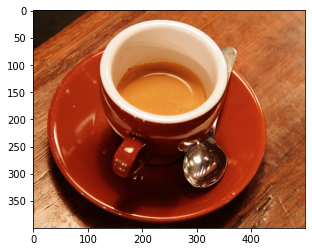

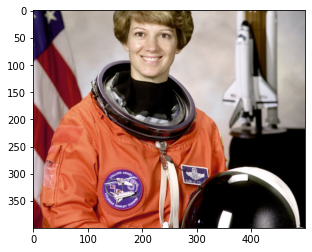

In [21]:
img1=imageio.imread('imageio:coffee.png')[:,50:550,:]/255
print(img1.shape)
print(img1.dtype)
plt.figure(0)
plt.imshow(img1)

img2=imageio.imread('imageio:astronaut.png')[56:456,6:506,:]/255
print(img2.shape)
print(img2.dtype)
plt.figure(1)
plt.imshow(img2)

Covierto las imágenes al espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


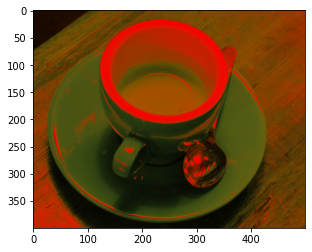

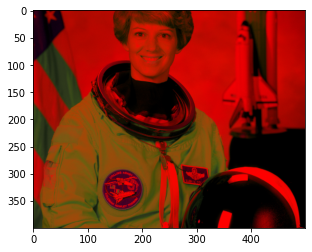

In [22]:
yiq1=rgb_yiq(img1)
yiq2=rgb_yiq(img2)
plt.figure(2)
plt.imshow(yiq1)
plt.figure(3)
plt.imshow(yiq2)

Suma Clampeada en el espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resultado de la Suma Clampeada
1.0
-0.09905319373718666


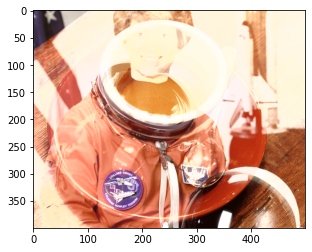

In [23]:
yiq3=sum_clamp(yiq1,yiq2)
rgb3=yiq_rgb(yiq3)
print("Resultado de la Suma Clampeada")
print(yiq3[:,:,0].max())
print(yiq3.min())
plt.figure(4)
plt.imshow(rgb3)

Suma Promediada en el espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resultado de la Suma Promediada
0.9779358652137273
-0.16476693006588236


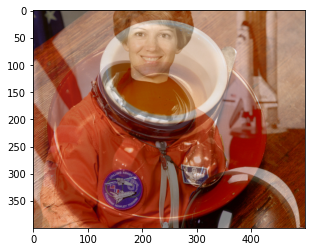

In [24]:
yiq4=sum_prom(yiq1,yiq2)
rgb4=yiq_rgb(yiq4)
print('Resultado de la Suma Promediada')
print(rgb4.max())
print(rgb4.min())
plt.figure(5)
plt.imshow(rgb4)

CuasiSuma "If Lighter" en el espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resultado de operación If Lighter
1.0008353178356861
-4.604345098104673e-06


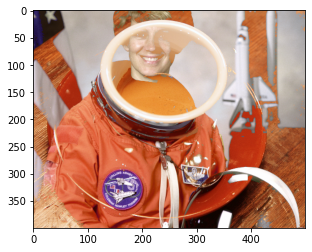

In [25]:
yiq5=if_lighter(yiq1, yiq2)
rgb5=yiq_rgb(yiq5)
print('Resultado de operación If Lighter')
print(rgb5.max())
print(rgb5.min())
plt.figure(6)
plt.imshow(rgb5)

Resta Clampeada en el espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resultado de la Resta Clampeada
0.9941372549019607
0.0


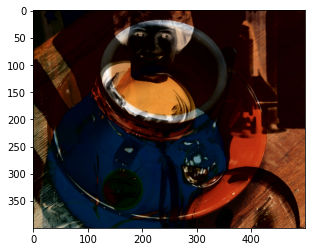

In [26]:
yiq6=res_clamp(yiq1, yiq2)
rgb6=yiq_rgb(yiq6)
print('Resultado de la Resta Clampeada')
print(yiq6[:,:,0].max())
print(yiq6[:,:,0].min())
plt.figure(7)
plt.imshow(rgb6)

Resta Promediada en el espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resultado de la Resta Promediada
0.947535294117647
0.007780392156862744


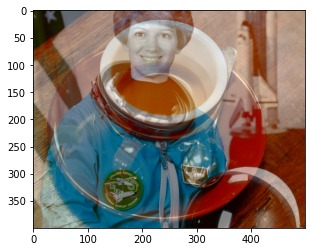

In [27]:
yiq7=res_prom(yiq1, yiq2)
rgb7=yiq_rgb(yiq7)
print('Resultado de la Resta Promediada')
print(yiq7[:,:,0].max())
print(yiq7[:,:,0].min())
plt.figure(8)
plt.imshow(rgb7)

CuasiSuma "If Darker" en el espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resultado de operación If Darker
0.9181725490196078
0.0


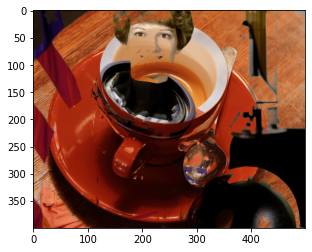

In [28]:
yiq8=if_darker(yiq1, yiq2)
rgb8=yiq_rgb(yiq8)
print('Resultado de operación If Darker')
print(yiq8[:,:,0].max())
print(yiq8[:,:,0].min())
plt.figure(9)
plt.imshow(rgb8)